**I am Attempting to do a data analysis on a dataset provided in my just completed LUX DEV Data Science for Everyone Bootcamp. I uploaded the dataset to an SQL server and I'll be querying it directly from the server and giving key insights on the data by plotting using matplotlib and doing data transformation using numpy and pandas and pyodbc SQL connection library**

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import pyodbc
import numpy as np

Initiating a connection to the local database using pyodbc 

In [3]:
conn = pyodbc.connect(
    Driver="ODBC Driver 17 for SQL Server",
    Server="JAQENIZO\SQLEXPRESS",
    Trusted_connection="Yes",
    Database='CRAIGSLIST'
)

cursor = conn.cursor()

Querying  vehicles from the database that took the shortest time to sell 

In [4]:
query1 = """
SELECT manufacturer,model,stay_length from VEHICLES_DETAILS  where stay_length ='short'
"""

cursor.execute(query1)
shortStays = cursor.fetchall()

In [6]:
#Used set to drop duplicates in the manufacturers 
manufacc =list(set(np.array([i[0] for i in shortStays])))
allManufacc = [i[0] for i in shortStays]
count_manufacc = []
for i in manufacc:
    count_manufacc.append((i,allManufacc.count(i)))
    

df= pd.DataFrame(index=[i[0]for i in count_manufacc],columns=["number_of_veh"],data=[i[1] for i in count_manufacc])
df.sort_values(by=["number_of_veh"],inplace=True,ascending=False)
# print(df.values.reshape(len(df.values)))


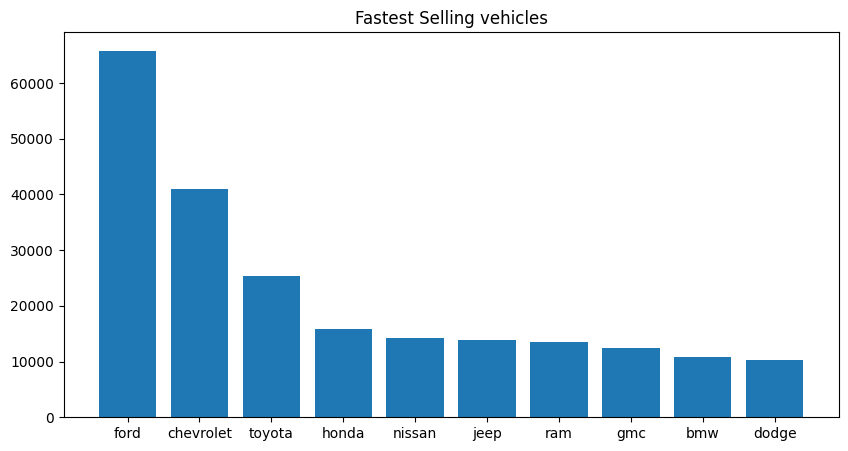

In [10]:
plt.figure(figsize=(10,5))
plt.bar(df.index[:10],df.values.reshape(len(df.values))[:10])
plt.title("Top 10 Fastest Selling vehicles")
plt.show()

In [ ]:
query2 = """
SELECT veh_state,stay_length from VEHICLES_DETAILS WHERE stay_length='long'
"""
cursor.execute(query2)
longStates = [i[0] for i in cursor.fetchall()]
countState = []
for i in longStates:
    countState.append((i,longStates.count(i)))

countState= list(set(countState))
dfStates = pd.DataFrame(data=[i[1] for i in countState],columns=["num_vehicles"],index=[i[0] for i in countState])
dfStates.sort_values(by=["num_vehicles"],ascending=False,inplace=True)




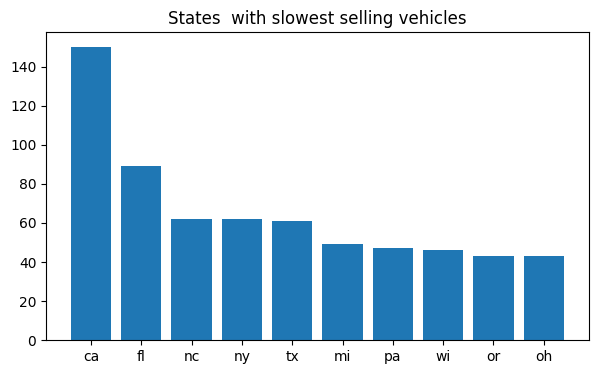

In [29]:
plt.figure(figsize=(7,4))
plt.bar(dfStates.index[:10],[i for i in dfStates.values.reshape(len(dfStates.values))][:10])
plt.title("Top 10 States  with slowest selling vehicles")
plt.show()

In [ ]:
query3 = """
SELECT veh_state,stay_length from VEHICLES_DETAILS WHERE stay_length ='short'
"""

cursor.execute(query3)
shortStayStates = [i[0] for i in cursor.fetchall()]
shortStayStates
uniqueStates = list(set(shortStayStates))
countStates = []
for i in uniqueStates:
    countStates.append((i,shortStayStates.count(i)))

dfShortState = pd.DataFrame(data=[i[1] for i in countStates],columns=["num_of_veh"],index=[i[0] for i in countStates])
dfShortState.sort_values(by=['num_of_veh'],inplace=True,ascending=False)
dfShortState


In [57]:
dfShortState.values

array([[37447],
       [21204],
       [17180],
       [14402],
       [13112],
       [12678],
       [12645],
       [11307],
       [10376],
       [10199],
       [ 8438],
       [ 8277],
       [ 8205],
       [ 7890],
       [ 7744],
       [ 7227],
       [ 6667],
       [ 6470],
       [ 6413],
       [ 6042],
       [ 5685],
       [ 5222],
       [ 4970],
       [ 4690],
       [ 4661],
       [ 4551],
       [ 4231],
       [ 3831],
       [ 3674],
       [ 3506],
       [ 3295],
       [ 3179],
       [ 3115],
       [ 2980],
       [ 2540],
       [ 2379],
       [ 2374],
       [ 2252],
       [ 2216],
       [ 2186],
       [ 2168],
       [ 1835],
       [ 1718],
       [  978],
       [  845],
       [  779],
       [  770],
       [  763],
       [  698],
       [  452],
       [  307]], dtype=int64)

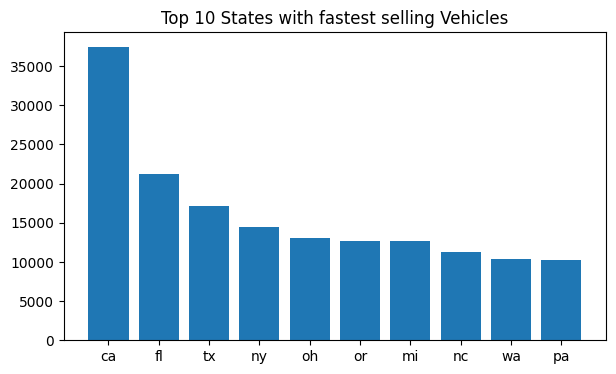

In [59]:
plt.figure(figsize=(7,4))
plt.bar(dfShortState.index[:10],dfShortState.values.reshape(len(dfShortState.values))[:10])
plt.title("Top 10 States with fastest selling Vehicles")
plt.show()

In [63]:
query4 = """
SELECT manufacturer from VEHICLES_DETAILS WHERE stay_length='short'
"""

cursor.execute(query4)

fastSelling = [i[0] for i in cursor.fetchall()]


[('datsun', 46),
 ('infiniti', 3530),
 ('tesla', 665),
 ('kia', 6295),
 ('rover', 1571),
 ('bmw', 10895),
 ('land rover', 16),
 ('ram', 13594),
 ('porsche', 1006),
 ('subaru', 7038),
 ('jeep', 13957),
 ('honda', 15764),
 ('toyota', 25348),
 ('nissan', 14163),
 ('buick', 4073),
 ('volkswagen', 7019),
 ('volvo', 2480),
 ('gmc', 12432),
 ('alfa-romeo', 663),
 ('jaguar', 1436),
 ('mazda', 4070),
 ('fiat', 580),
 ('chevrolet', 40936),
 ('harley-davidson', 112),
 ('pontiac', 1709),
 ('cadillac', 5206),
 ('mercury', 871),
 ('saturn', 825),
 ('lexus', 6076),
 ('lincoln', 3128),
 ('mitsubishi', 2413),
 ('hyundai', 7725),
 ('acura', 4409),
 ('dodge', 10235),
 ('ford', 65827),
 ('mercedes-benz', 8704),
 ('ferrari', 71),
 ('mini', 1767),
 ('morgan', 2),
 ('audi', 5643),
 ('aston-martin', 18),
 ('chrysler', 4455)]

In [64]:
fastSellingBrands = set(fastSelling)
vehNumber = []

for i in fastSellingBrands:
    vehNumber.append((i,fastSelling.count(i)))
vehNumber

dfFastSelling = pd.DataFrame(data=[i[1] for i in vehNumber],columns=["num_of_veh"],index=[i[0] for i in vehNumber])
dfFastSelling.sort_values(by=["num_of_veh"],inplace=True,ascending=False)

dfFastSelling

,num_of_veh
ford,65827
chevrolet,40936
toyota,25348
honda,15764
nissan,14163
jeep,13957
ram,13594
gmc,12432
bmw,10895
dodge,10235


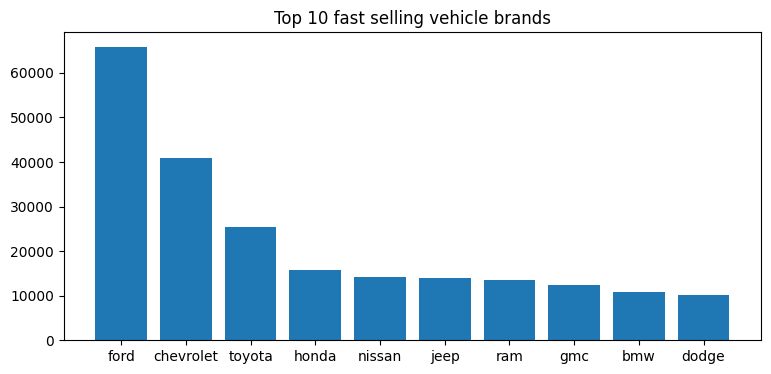

In [70]:
plt.figure(figsize=(9,4))
plt.bar(dfFastSelling.index[:10], df.values.reshape(len(df.values))[:10])
plt.title("Top 10 fast selling vehicle brands")
plt.show()

